# NLP. Lesson 6. Parsing. Syntax

## Parsing

In the 3rd lesson we considered POS tagging and parsing basics. Today we are going to dive deeper in NLP parsing and observe its types. 

`Parsing` is the process of examining the `grammatical structure` and relationships inside a given sentence or text in natural language processing (NLP). It involves analyzing the text to determine the roles of specific words, such as nouns, verbs, and adjectives, as well as their interrelationships. This analysis produces a structured representation of the text, allowing NLP computers to understand how words in a phrase connect to one another. Parsers expose the structure of a sentence by constructing parse trees or dependency trees that illustrate the hierarchical and syntactic relationships between words.

Natural languages follow certain rules of grammar. This helps the parser extract the structure. Formally, we can define parsing as:
>the process of determining whether a string of tokens can be generated by a grammar.
By extracting and representing this structure, we transform the original plain input into something more useful for many downstream NLP tasks.

Typical parsing flow:

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/ParsingFlow.png" alt="Typical parsing flow" width="800"/>

In a typical flow, input text goes into a lexical analyzer that produces individual tokens. These tokens are the input to a parser, which produces the syntactic structure at the output. When this structure is graphically represented as a tree, it's called a Parse Tree. A parse tree can be simplified into an intermediate representation called Abstract Syntax Tree (AST). Structure can be represented either as a phrase structure tree or in labelled bracketed notation.

### Types

- **Syntactic Parsing:** deals with a sentence’s `grammatical structure`. It involves looking at the sentence to determine parts of speech, sentence boundaries, and word relationships. The following sub-parts of Syntatic parsing were observed in the 3rd lesson:
  - **Constituency Parsing**: builds parse trees that break down a sentence into its constituents, such as noun phrases and verb phrases. It displays a sentence’s `hierarchical` structure, demonstrating how words are arranged into bigger grammatical units.
  - **Dependency Parsing**: depicts grammatical links between words by constructing a tree structure in which each word in the sentence is `dependent` on another. It is frequently used in tasks such as information extraction and machine translation because it focuses on word relationships such as subject-verb-object relations.
- **Semantic Parsing:** goes beyond syntactic structure to extract a sentence’s `meaning` or semantics. It attempts to understand the roles of words in the context of a certain task and how they interact with one another. It can be seen in:
  - Named Entity Recognition (NER): identifying and classifying entities such as names of people, organizations, locations, etc.
  - Semantic Role Labeling (SRL): determining the roles that different words play in a sentence.
  - Abstract Meaning Representation (AMR): creating a graph-based representation of the meaning of sentences.

### Applications

- Syntactic Analysis
- Named Entity Recognition (NER)
- Semantic Role Labeling (SRL)
- Machine Translation
- Question Answering
- Text Summarization
- Information Extraction

### Difficulties: structural ambiguity and correct embedding

Structural ambiguity is the potential of multiple interpretations for a piece of language because of the way words or phrases are organized. This can lead to several different parse trees produced from the same sentence or phrase. An example is "I shot an elephant in my pajamas." Was I or was the elephant wearing my pajamas? Humans also use sarcasm, colloquial phrases, idioms, and metaphors. They may also communicate with grammatical or spelling errors.

One more problem is to obtain the correct semantic relationships and understand the context of discussion. Word embeddings such as word2vec operate at word level. This work needs to be extended to phrases.

### Example workflow

1. POS tagging. Output - tags (determined parts of speech) for each word
2. Constituency parsing. Using POS tags to form a tree structure. Breaks down into noun phrases (NP) and verb phrases (VP).
3. Dependency parsing. Analyzes dependencies between words.
4. Shallow parsing. Identifies chunks using POS tags. Simplifies parsing by grouping chunks without deep hierarchical structure.
5. NER. Identifies entities.
6. Semantic parsing. Converts sentence into a meaningful representation, such as an intent and slots in a chatbot application.

## Syntax tree

A Syntax tree or a parse tree is a tree representation (hierarchical structure) of different syntactic categories of a sentence according to a given grammar. It helps us to understand the syntactical structure of a sentence. Parse trees may be generated for sentences in natural languages, as well as during processing of computer languages, such as programming languages.

The standard way to represent the syntactic structure of a grammatical sentence. There are 2 types:
- Constituency-based parse tree: represents the sentence structure by breaking it down into sub-phrases or `constituents`, usually derived from a context-free grammar, shows the syntactic structure of a sentence.
- Dependency-based parse tree: represents the grammatical structure of a sentence by showing the `dependencies` between words, simpler on average than constituency-based parse trees because they contain fewer nodes.


<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/ConstituencyParseTree.png" alt="Constituency Parse Tree" width="600"/>

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/DependencyParseTree.png" alt="Dependency Parse Tree" width="600"/>

In [1]:
import nltk
from nltk import pos_tag, word_tokenize, RegexpParser

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

!pip install svgling

[nltk_data] Downloading package punkt to /home/anastasia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/anastasia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
def create_syntax_tree(sentence: str) -> nltk.tree.tree.Tree:
    """ Function for creating the nltk constituency-based syntax tree
    
    Args:
        sentence (str): a sentence that should be represented as a tree

    Returns:
        syntax_tree(nltk.tree.tree.Tree): the tree
    """

    # Find all parts of speech in sentence
    tagged = pos_tag(word_tokenize(sentence))

    # Extract all parts of speech from  sentence. Define the grammar
    chunker = RegexpParser(
        """
    NP: {<DT>?<JJ>*<NN>} #To extract Noun Phrases
    P: {<IN>}            #To extract Prepositions
    V: {<V.*>}           #To extract Verbs
    PP: {<p> <NP>}       #To extract Prepositional Phrases
    VP: {<V> <NP|PP>*}   #To extract Verb Phrases
    """
    )

    # Parse the sentence using chunker
    syntax_tree = chunker.parse(tagged)
    return syntax_tree


In [3]:
sentence = "He clustered the data into information granules"
syntax_tree = create_syntax_tree(sentence)
print(syntax_tree)

(S
  He/PRP
  (VP (V clustered/VBD) (NP the/DT data/NN))
  (P into/IN)
  (NP information/NN)
  granules/NNS)


In [4]:
import os

os.system(
    "Xvfb :1 -screen 0 1600x1200x16  &"
)  # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ["DISPLAY"] = ":1.0"

sh: line 1: Xvfb: command not found


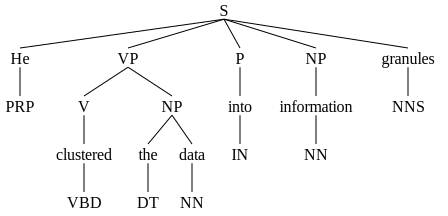

In [5]:
from IPython.display import display

display(syntax_tree)

## Dependency parsing

In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence.

<img src="https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png" alt="Typical parsing flow" width="800"/> 

Dependency Parsing used in shallow parsing and NER. A produced result contains root nodes and dependent nodes. The root nodes are usually Verbs, they are the main part in the sentence. 

### Task 1.
Recall the building of Dependency Parsing using spaCy. 

In [6]:
import spacy
from spacy import displacy

# Load the language
nlp = spacy.load("en_core_web_sm")

# Parse the sentence
sentence_output = nlp(
    "Innopolis University is a university located in the city of Innopolis."
)

# Display
displacy.render(
    sentence_output,
    jupyter=True,
    options={"distance": 110, "arrow_stroke": 2, "arrow_width": 8},
)

### Task 2.
Fill the gaps. Find the dependent words in sentences (direct dependencies and roots).

In [7]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def find_direct_dependents(sentence, word):
    doc = nlp(sentence)
    dependents = [token.text for token in doc if token.head.text == word]
    return dependents

# Test cases
sentence1 = "The quick brown fox jumps over the lazy dog."
word1 = "jumps"
sentence2 = "She enjoys playing tennis."
word2 = "enjoys"

# Expected output for test cases
expected_output1 = ['fox', 'jumps', 'over', '.']
expected_output2 = ['She', 'enjoys', 'playing', '.']

# Asserts to check correctness
assert find_direct_dependents(sentence1, word1) == expected_output1, "Test case 1 is failed"
assert find_direct_dependents(sentence2, word2) == expected_output2, "Test case 2 is failed"

In [8]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_root(sentence):
    doc = nlp(sentence)
    root = [token.text for token in doc if token.head == token][0]
    return root

# Test cases
sentence1 = "The quick brown fox jumps over the lazy dog."
sentence2 = "She enjoys playing tennis."

# Expected output for test cases
expected_output1 = 'jumps'
expected_output2 = 'enjoys'

# Asserts to check correctness
assert extract_root(sentence1) == expected_output1, "Test case 1 is failed"
assert extract_root(sentence2) == expected_output2, "Test case 2 is failed"

## Constituency Parsing

Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. A constituency parser can be built based on such grammars/rules. The grammar has to be defined.

Lets build the constituency parsing using benepar and spaCy libraries.

In [9]:
%%capture
!pip install benepar
!python -m spacy download en_core_web_md
# In colab ⚠ Restart to reload dependencies

In [10]:
import benepar, spacy

nlp = spacy.load('en_core_web_md')
benepar.download('benepar_en3')
nlp.add_pipe('benepar', config={'model': 'benepar_en3'})
doc = nlp('The time for action is now. It is never too late to do something.')


[nltk_data] Downloading package benepar_en3 to
[nltk_data]     /home/anastasia/nltk_data...
[nltk_data]   Unzipping models/benepar_en3.zip.
/home/anastasia/NLPcourse/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a

In [11]:
sent = list(doc.sents)[0]

print(sent._.parse_string)
# (S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))

print(sent._.labels)
# ('S',)

print(list(sent._.children)[0])

(S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))
('S',)
The time for action


## Parsing Techniques

### Top-Down parsing
Top-Down parsing starts from the highest-level rule (the start symbol, typically the sentence (S)) and works its way down to the input tokens by recursively breaking down the rules.

Characteristics:

- Starts from the root (S) and tries to rewrite it to match the input sentence.
- Can be recursive and uses backtracking.
- It tries to construct the parse tree from the top (start symbol) to the leaves (input tokens).

Example of Top-Down Parsing:

Sentence: the cat sees the dog. 

S -> NP VP (the cat (NP) sees the dog (VP))

NP -> DT N (the (DT) cat (N))

VP -> V NP (sees (V) the dog (NP))

NP -> DT N (the (DT) dog (N))

#### Backtracking case:

Take the sentence: “John is playing game”. Grammar rules: S = Noun Phrase (NP)  + Verb Phrase (VP) + Preposition Phrase (PP). The first attempt to find the correct tree is to split the sentence on NP + VP.

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/TopDown1.png" alt="Top down parsing 1" width="800"/> 

Part of the speech (NP) does not match the input string, because there is no Determinator+Noun, backtrack to the node NP.
<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/TopDown2.png" alt="Top down parsing 2" width="800"/> 

Part of the speech verb does not match the input string, "is" isn't represented in the tree, backtrack to the node S, since PNoun is matched.
<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/TopDown3.png" alt="Top down parsing 3" width="800"/> 

- Simple to implement, clear and intuitive approach
- Can be inefficient due to backtracking, and not suitable for left-recursive grammars (which can lead to infinite loops)

### Bottom-Up parsing
Bottom-Up parsing starts from the input tokens and works its way up to the start symbol by combining the tokens according to the grammar rules. Builds the parse tree by identifying sub-phrases and combining them. More systematic and often more efficient than top-down parsing.
- Can handle left-recursive grammars efficiently
- More complex, requires more memory for storing intermediate results

#### Example
Consider the same sentence with John and the same grammar.
<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/BottomUp1.png" alt="Bottom Up parsing 1" width="800"/> 
<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/BottomUp2.png" alt="Bottom Up parsing 2" width="800"/> 

Lets consider the Top-Down variant of parsing and apply the Recursive Descent Parser (will be explaine in the next section). 

In [25]:
class RecursiveDescentParser:
    """ Class for parsing mathematical expressions. """
    def __init__(self, tokens):
        self.tokens = tokens
        self.position = 0

    def parse(self):
        return self.E()

    def match(self, expected_token):
        if self.position < len(self.tokens) and self.tokens[self.position] == expected_token:
            self.position += 1
            return True
        return False

    def E(self):
        node = self.T()
        if self.match('+'):
            right = self.E()
            node = ('+', node, right)
        return node

    def T(self):
        node = self.F()
        if self.match('*'):
            right = self.T()
            node = ('*', node, right)
        return node

    def F(self):
        if self.match('('):
            node = self.E()
            if not self.match(')'):
                raise SyntaxError("Expected ')'")
            return node
        elif self.position < len(self.tokens) and self.tokens[self.position].isdigit():
            node = ('number', self.tokens[self.position])
            self.position += 1
            return node
        else:
            raise SyntaxError("Expected number or '('")

# Example usage
expression = '( 3 + 5 ) * 2'
tokens = expression.split()
parser = RecursiveDescentParser(tokens)
parse_tree = parser.parse()
parse_tree

('*', ('+', ('number', '3'), ('number', '5')), ('number', '2'))

## Parsers Types

Parsers search through the space of a variety of trees to find the best tree for the provided text. Let’s have a look at some of the accessible parsers below:
1. **Recursive Descent Parser:** a straightforward implementation of top-down parsing, uses a set of recursive functions to process the input. Iteratively breaks down the highest-level grammar rule into subrules is known as a recursive descent parser.

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/RecDesParser.png" alt="Recursive descent parsing" width="800"/>

2. **Shift-Reduce Parser:** sort of bottom-up parser that starts with the input and builds a parse tree by performing a series of shift (transfer data to the stack) and reduction (apply grammar rules) operations. 

<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/ShiftReduceParser.png" alt="Recursive descent parsing" width="600"/>

3. **RegExp Parser:** (regular expression) parser, is used to match patterns and extract text. It scans a larger text or document for substrings that match a specific regular expression pattern. Using regular expressions to identify substrings that match specific patterns, extracting meaningful units (tokens) from text based on patterns, extracting sub-parts of the matched strings using parentheses. Basic syntax:
<img src="https://raw.githubusercontent.com/Dnau15/LabImages/main/images/lab06/RegExpSyntax.png" alt="Recursive descent parsing" width="600"/>

    - You can find more [here](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Regular_expressions/Cheatsheet)

Lets observe how the RegExp parser finds email addresses:

In [17]:
import re

# Example text
text = "Please contact us at support@example.com or sales@example.org."

# Regular expression for matching email addresses
email_pattern = r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+'

# Find all email addresses
emails = re.findall(email_pattern, text)

emails

['support@example.com', 'sales@example.org.']

### Task 3.
Write a Shift-Reduce parser for mathematical expressions in 'function' format. Here we suggest to apply expressions only with '*' and '+' signs but you can add subtraction, division, or parentheses. For optional operands you have to assign `i_added_subtraction_and_division` variable as True for th correct check. For following the mathematical rules (to take into account the priority of the operators) create the dictionary with priorities and 2 stacks: 1 is for operands and another is for operators.


In [38]:
def shift_reduce_parser(expression: str):
    """ Fuction for parsing mathematical expressions

    Args:
        expression (str): text representation of an expression

    Returns:
        int: the result of expression
    """
    tokens = expression.split()
    operand_stack = []
    operator_stack = []
    precedence = {'+': 1, '-': 1, '*': 2, '/': 2}

    def apply_operator():
        """ Inner function for computing expressions.
        Here you need to check if there are 2 or more operands in the stack, 
        1 or more operators, extract them and compute the result """
        if len(operand_stack) < 2 or not operator_stack:
            return
        b = operand_stack.pop()
        a = operand_stack.pop()
        op = operator_stack.pop()
        if op == '+':
            operand_stack.append(a + b)
        if op == '-':
            operand_stack.append(a - b)
        elif op == '*':
            operand_stack.append(a * b)
        elif op == '/':
            operand_stack.append(a / b)

    for token in tokens:
        """ Here you need to iterate through the tokens, 
        add them into corresponding stacks,
        or perform the operations using apply_operator().
        Don't forget about operators' priority.
        """
        if token.isdigit():
            operand_stack.append(int(token))
        elif token in precedence:
            # handle the operators' priority
            while (operator_stack and precedence[operator_stack[-1]] >= precedence[token]):
                apply_operator()
            operator_stack.append(token)

    while operator_stack:
        apply_operator()

    return operand_stack[0] if operand_stack else None


# Test the function with expressions
expression1 = "6 + 10 * 6"
expression2 = "2 * 3 + 15"

i_added_subtraction_and_division = True
expression3 = "6 / 2 + 5 * 4 - 8"

result1 = shift_reduce_parser(expression1)
result2 = shift_reduce_parser(expression2) 

assert result1 == 66, 'Test case 1 is failed'
assert result2 == 21, 'Test case 1 is failed'

if i_added_subtraction_and_division:
    result3 = shift_reduce_parser(expression3)
    assert result3 == 15, 'Optional test case3 is failed'


# Conclusion

In this lesson, we delved deeper into aspects of parsing in Natural Language Processing, exploring its various types, techniques, and practical applications. Parsing is a critical process in NLP that involves analyzing the syntactic structure of sentences to understand their grammatical organization and meaning.

- **Syntactic Parsing:** focuses on the grammatical structure of sentences, producing parse trees that represent syntactic constructs. Semantic Parsing: goes beyond syntax to understand the meaning of sentences by converting them into logical forms or structured data.
- **Syntax Trees:** Constituency Parse Trees represent the hierarchical structure of sentences, breaking them down into nested constituents (phrases). Dependency Parse Trees represent the grammatical relationships between words in a sentence, showing dependencies directly between head words and their dependents.
- **Dependency Parsing and Constituency Parsing**
- **Parsing Techniques:** Top-Down Parsing begins with the start symbol and breaks down the rules to match the input sentence from the root to the leaves. Bottom-Up Parsing begins with the input tokens and builds up to the start symbol by combining tokens according to grammar rules.
- **Types of Parsers:** Regexp Parsers use regular expressions to match patterns in text, useful for simple pattern matching and text extraction tasks. Recursive Descent Parsers - top-down parsers that use a set of recursive functions to process the input, providing an intuitive but potentially inefficient approach. Shift-Reduce Parsers - type of bottom-up parsers that build the parse tree incrementally by shifting tokens onto a stack and reducing them using grammar rules, offering a systematic and efficient approach.

Parsing is a powerful tool that enables deeper understanding and processing of natural language, forming the backbone of many advanced NLP applications.